In [1]:
%pip install numpy scikit-fuzzy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy System for Smart Home Energy Management

Implement a fuzzy logic system that manages home appliances' energy usage by balancing user preferences and energy cost efficiency. This system can prioritize certain appliances during peak usage times to save energy.

## Input Variables
Input variables are variables that become inputs or parameters that affect system decisions. In this system, input variables represent environmental conditions or circumstances that can affect energy use at home.

Input variables include:
1. time_of_day: Represents the time of day.
2. outdoor_temp (Outside Temperature): Represents the ambient temperature outside the house.
3. occupancy: Represents the number of people in the house.
4. solar_intensity: Represents the level of solar radiation.

## Output Variables
Output variables are the results or decisions produced by the system based on the given inputs. In the context of smart home energy management, output variables represent how energy will be used or managed.

Output variables include:
1. hvac_power: Represents how much power is used for the heating, ventilation, and air conditioning (HVAC) system.
2. lighting_power: Represents how much power is used for the lighting system.
3. appliance_power: Represents how much power is used for other household appliances.

## Relationship Between Input and Output
Fuzzy systems use the concept of "fuzzification" to convert crisp input values into membership degrees in fuzzy sets. Then, through the fuzzy inference process and predefined rules, the system generates fuzzy outputs. Finally, through the process of "defuzzification", the fuzzy output is converted back into a firm value that can be used to control devices in the smart home.

In [3]:
# input variables
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')            # range: 0 - 23 (24 hours)
outdoor_temp = ctrl.Antecedent(np.arange(-10, 41, 1), 'outdoor_temp')        # range: 10°C - 40°C
occupancy = ctrl.Antecedent(np.arange(0, 11, 1), 'occupancy')                # range: 0 - 10 (number of people)
solar_intensity = ctrl.Antecedent(np.arange(0, 1001, 1), 'solar_intensity')  # range: 0 - 1000 (W/m²)

In [4]:
# output variables
hvac_power = ctrl.Consequent(np.arange(0, 101, 1), 'hvac_power')            # range: 0% - 100% (power percentation)
lighting_power = ctrl.Consequent(np.arange(0, 101, 1), 'lighting_power')    # range: 0% - 100% (power percentation)
appliance_power = ctrl.Consequent(np.arange(0, 101, 1), 'appliance_power')  # range: 0% - 100% (power percentation)

In [5]:
# membership functions for input variables
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [0, 3, 6])
time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [5, 8, 11])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [10, 14, 18])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [17, 20, 23])

outdoor_temp['cold'] = fuzz.trimf(outdoor_temp.universe, [-10, 0, 10])
outdoor_temp['mild'] = fuzz.trimf(outdoor_temp.universe, [5, 15, 25])
outdoor_temp['hot'] = fuzz.trimf(outdoor_temp.universe, [20, 30, 40])

occupancy['low'] = fuzz.trimf(occupancy.universe, [0, 0, 5])
occupancy['medium'] = fuzz.trimf(occupancy.universe, [3, 5, 7])
occupancy['high'] = fuzz.trimf(occupancy.universe, [6, 10, 10])

solar_intensity['low'] = fuzz.trimf(solar_intensity.universe, [0, 0, 400])
solar_intensity['medium'] = fuzz.trimf(solar_intensity.universe, [300, 500, 700])
solar_intensity['high'] = fuzz.trimf(solar_intensity.universe, [600, 1000, 1000])

In [6]:
# membership functions for output variables
hvac_power['low'] = fuzz.trimf(hvac_power.universe, [0, 0, 50])
hvac_power['medium'] = fuzz.trimf(hvac_power.universe, [30, 50, 70])
hvac_power['high'] = fuzz.trimf(hvac_power.universe, [60, 100, 100])

lighting_power['low'] = fuzz.trimf(lighting_power.universe, [0, 0, 40])
lighting_power['medium'] = fuzz.trimf(lighting_power.universe, [30, 50, 70])
lighting_power['high'] = fuzz.trimf(lighting_power.universe, [60, 100, 100])

appliance_power['low'] = fuzz.trimf(appliance_power.universe, [0, 0, 40])
appliance_power['medium'] = fuzz.trimf(appliance_power.universe, [30, 50, 70])
appliance_power['high'] = fuzz.trimf(appliance_power.universe, [60, 100, 100])

## The Rules
- **Rule 1**
  - *Interpretation*: If the time is nighttime AND the outside temperature is cold, then use medium HVAC power, low lighting power, and low equipment power.
  - *Reasoning*: On cold nights, we may need moderate heating (moderate HVAC), but can save energy on lighting and other appliances.
- **Rule 2**
  - *Interpretation*: If the time is early morning AND the outside temperature is moderate AND occupancy is high, then use moderate HVAC power, moderate lighting power, and high equipment power.
  - *Reasoning*: In the morning with many people at home, we may require higher energy usage for appliances (e.g. for cooking breakfast), medium lighting, and medium HVAC as the outside temperature is not extreme.
- **Rule 3**
  - *Interpretation*: If it is daytime AND the outside temperature is hot AND the solar intensity is high, then use high HVAC power, low lighting power, and medium equipment power.
  - *Reasoning*: On a hot and sunny day, the air conditioner (part of the HVAC) may need to work hard, but we can save energy on lighting because there is enough natural light.
- **Rule 4**
  - *Interpretation*: If the time is nighttime AND occupancy is medium, then use medium HVAC power, high lighting power, and medium equipment power.
  - *Reasoning*: At night with a moderate number of people at home, we may need more lighting, moderate appliance usage, and moderate HVAC.
- **Rule 5**
  - *Interpretation*: If occupancy is low AND solar intensity is low, then use low HVAC power, medium lighting power, and low equipment power.
  - *Reasoning*: With few people at home and cloudy conditions, we can save energy on HVAC and appliances, but may require moderate lighting due to lack of natural light.

In [7]:
# rules
rule1 = ctrl.Rule(time_of_day['night'] & outdoor_temp['cold'], (hvac_power['medium'], lighting_power['low'], appliance_power['low']))
rule2 = ctrl.Rule(time_of_day['morning'] & outdoor_temp['mild'] & occupancy['high'], (hvac_power['medium'], lighting_power['medium'], appliance_power['high']))
rule3 = ctrl.Rule(time_of_day['afternoon'] & outdoor_temp['hot'] & solar_intensity['high'], (hvac_power['high'], lighting_power['low'], appliance_power['medium']))
rule4 = ctrl.Rule(time_of_day['evening'] & occupancy['medium'], (hvac_power['medium'], lighting_power['high'], appliance_power['medium']))
rule5 = ctrl.Rule(occupancy['low'] & solar_intensity['low'], (hvac_power['low'], lighting_power['medium'], appliance_power['low']))

In [8]:
# control System
energy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
energy_management = ctrl.ControlSystemSimulation(energy_ctrl)

def manage_energy(time, temp, occup, solar):
  energy_management.input['time_of_day'] = time
  energy_management.input['outdoor_temp'] = temp
  energy_management.input['occupancy'] = occup
  energy_management.input['solar_intensity'] = solar
  energy_management.compute()
  
  return {
    'hvac_power': energy_management.output['hvac_power'],
    'lighting_power': energy_management.output['lighting_power'],
    'appliance_power': energy_management.output['appliance_power']
  }

In [9]:
scenarios = [
  (2, 5, 2, 0),     # nighttime, cold, few people, no sunlight
  (10, 22, 8, 600), # morning, medium temperature, many people, medium sunlight
  (14, 35, 5, 900), # daytime, hot, medium occupancy, high sunlight
  (20, 18, 6, 100)  # nighttime, medium temperature, medium occupancy, low sunlight
]

for i, (time, temp, occup, solar) in enumerate(scenarios, 1):
  result = manage_energy(time, temp, occup, solar)
  print(f"\nScenario {i}:")
  print(f"Time of Day: {time}:00, Outdoor Temperature: {temp}°C, Occupancy: {occup}, Solar Intensity: {solar}")
  print(f"HVAC Power: {result['hvac_power']:.2f}%")
  print(f"Lighting Power: {result['lighting_power']:.2f}%")
  print(f"Appliance Power: {result['appliance_power']:.2f}%")


Scenario 1:
Time of Day: 2:00, Outdoor Temperature: 5°C, Occupancy: 2, Solar Intensity: 0
HVAC Power: 31.07%
Lighting Power: 33.73%
Appliance Power: 14.86%

Scenario 2:
Time of Day: 10:00, Outdoor Temperature: 22°C, Occupancy: 8, Solar Intensity: 600
HVAC Power: 50.00%
Lighting Power: 50.00%
Appliance Power: 82.82%

Scenario 3:
Time of Day: 14:00, Outdoor Temperature: 35°C, Occupancy: 5, Solar Intensity: 900
HVAC Power: 84.44%
Lighting Power: 15.56%
Appliance Power: 50.00%

Scenario 4:
Time of Day: 20:00, Outdoor Temperature: 18°C, Occupancy: 6, Solar Intensity: 100
HVAC Power: 50.00%
Lighting Power: 84.44%
Appliance Power: 50.00%


/home/alzasyauqi/projects/ugm/intelligent_system/fuzzy-system-smart-home-energy-management/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


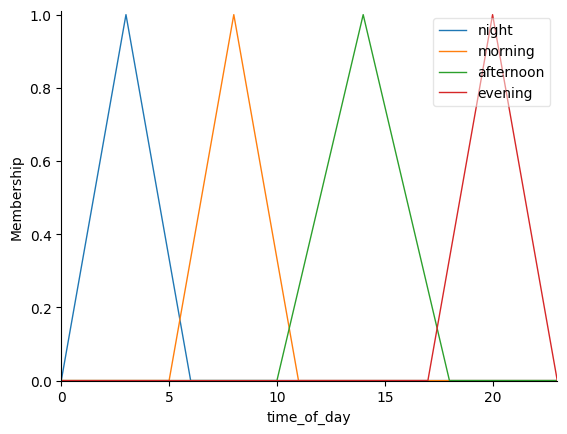

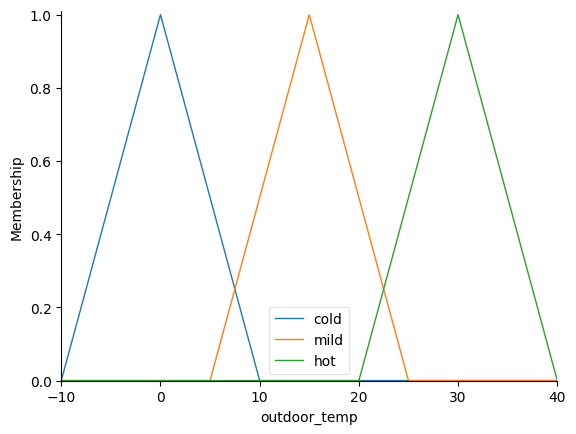

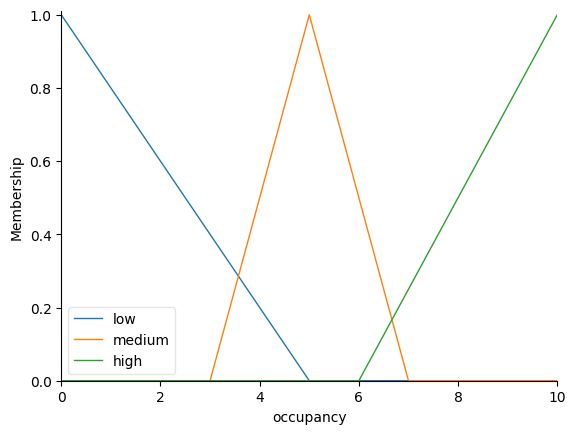

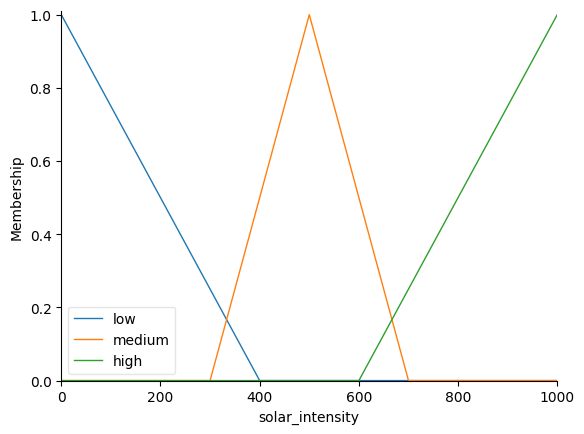

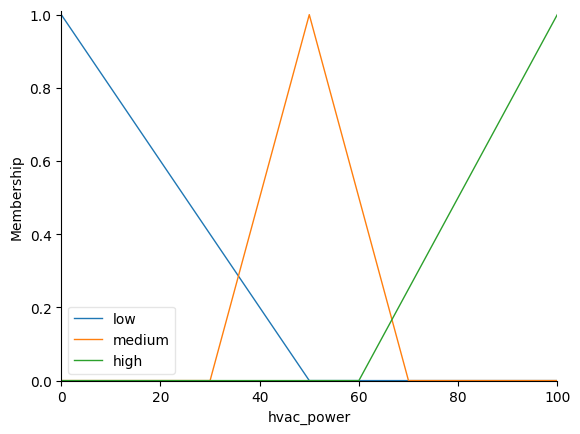

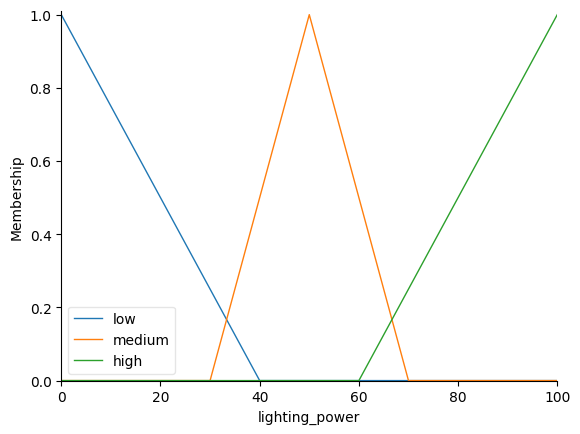

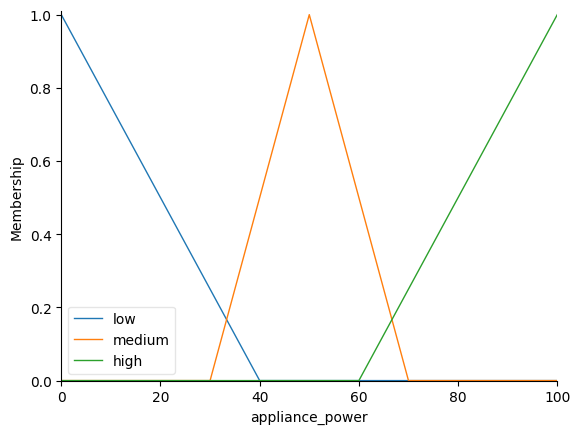

In [10]:
# visualisasi (opsional)
time_of_day.view()
outdoor_temp.view()
occupancy.view()
solar_intensity.view()
hvac_power.view()
lighting_power.view()
appliance_power.view()

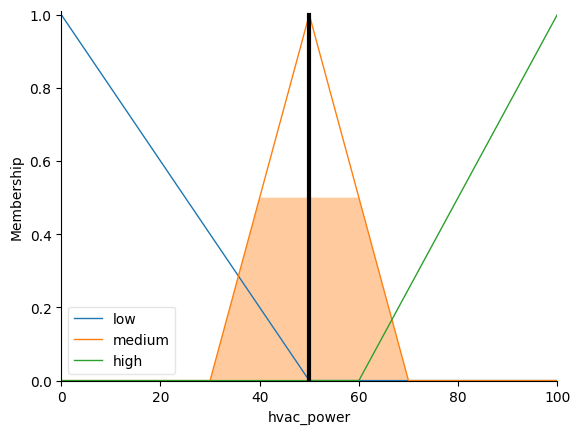

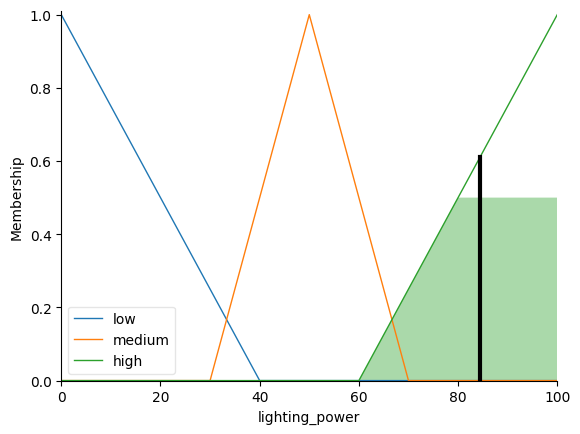

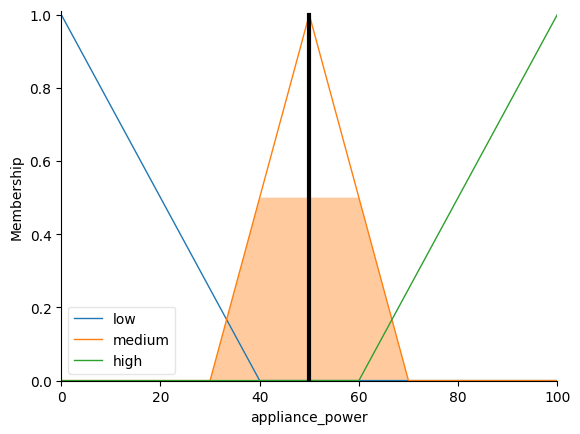

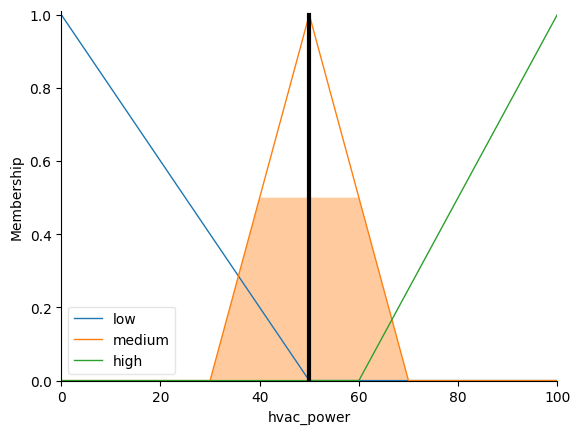

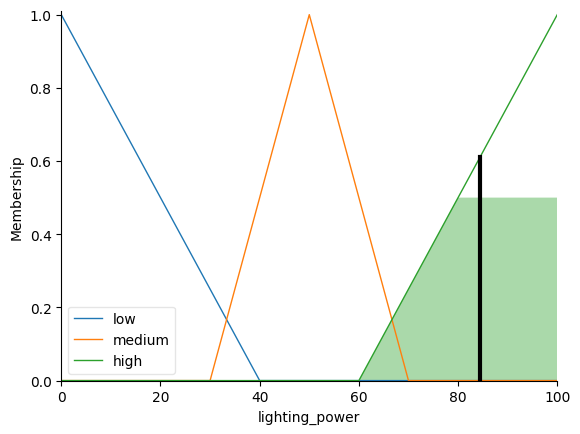

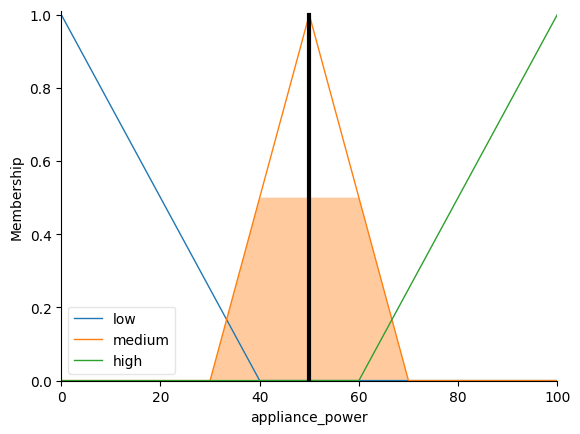

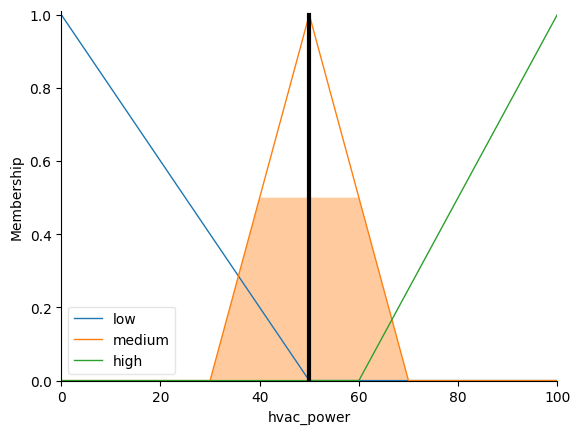

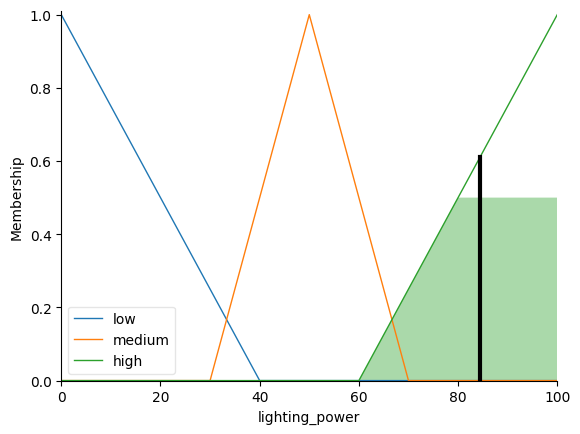

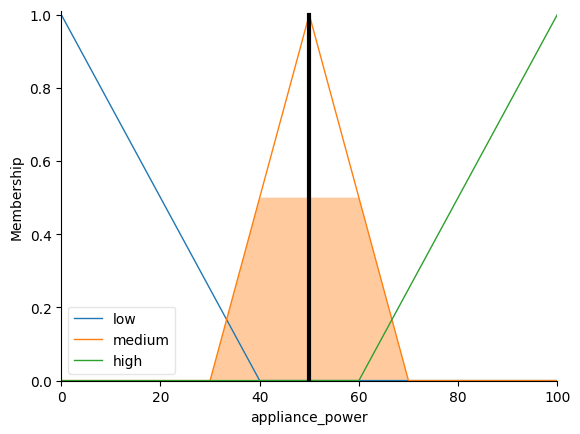

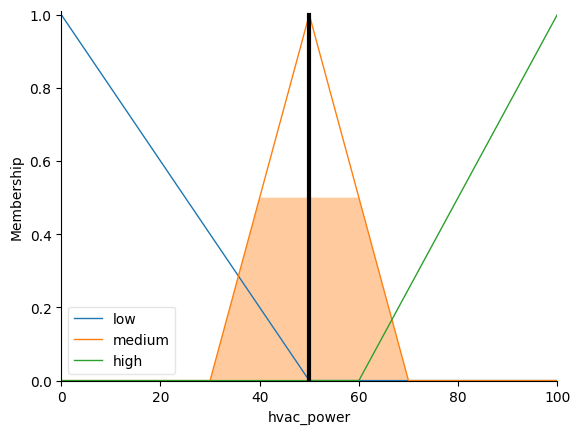

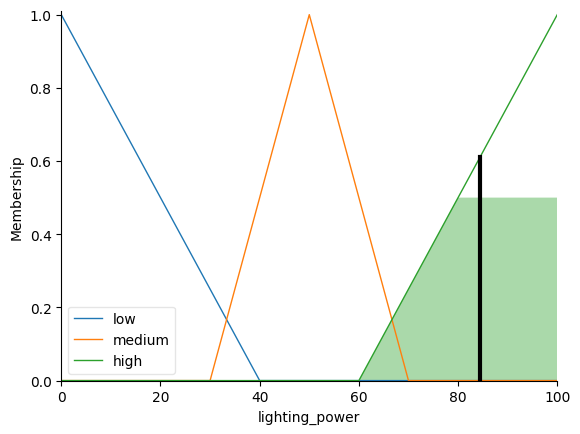

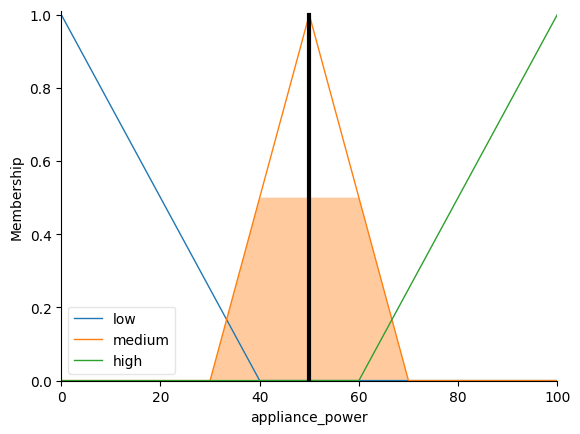

In [11]:
for i, (time, temp, occup, solar) in enumerate(scenarios, 1):
  # plot the resulting fuzzy values for the outputs
  hvac_power.view(sim=energy_management)
  lighting_power.view(sim=energy_management)
  appliance_power.view(sim=energy_management)

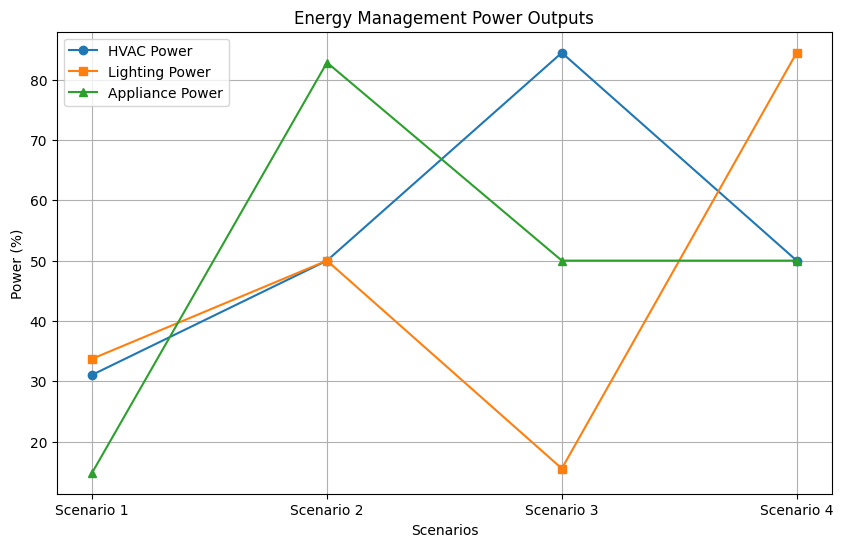

In [12]:
import matplotlib.pyplot as plt

# store results for plotting
results = {'hvac_power': [], 'lighting_power': [], 'appliance_power': []}

for time, temp, occup, solar in scenarios:
    result = manage_energy(time, temp, occup, solar)
    results['hvac_power'].append(result['hvac_power'])
    results['lighting_power'].append(result['lighting_power'])
    results['appliance_power'].append(result['appliance_power'])

# plot results
plt.figure(figsize=(10, 6))
x_labels = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']

plt.plot(x_labels, results['hvac_power'], label='HVAC Power', marker='o')
plt.plot(x_labels, results['lighting_power'], label='Lighting Power', marker='s')
plt.plot(x_labels, results['appliance_power'], label='Appliance Power', marker='^')

plt.title('Energy Management Power Outputs')
plt.xlabel('Scenarios')
plt.ylabel('Power (%)')
plt.legend()
plt.grid(True)
plt.show()